# WORKING WITH FITTED DISTRIBUTIONS

In [1]:
from reliability.Datasets import automotive
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt

## Example 1

In [2]:
dist = Weibull_Distribution(alpha = 500, beta = 3)

In [3]:
data = dist.random_samples(10, seed = 1)

In [7]:
fit = Fit_Weibull_2P(failures = data, show_probability_plot=False,print_results=False)

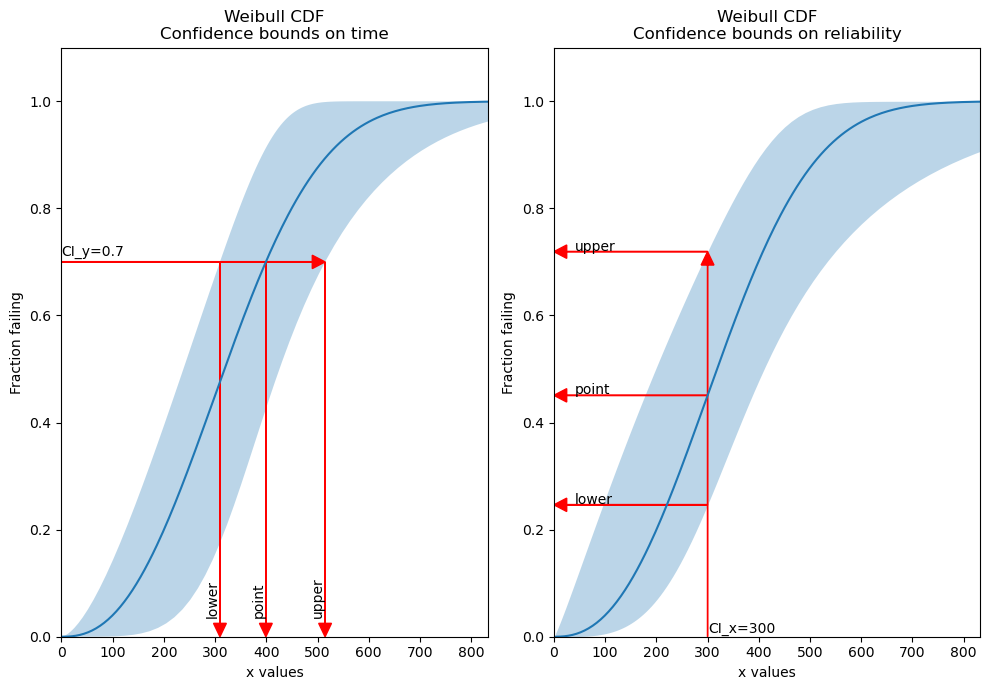

In [8]:
plt.figure(figsize=(10,7))
plt.subplot(121)
arrow_x = 25
arrow_y = 0.025

X_lower,X_point,X_upper = fit.distribution.CDF(CI_type='time',CI_y=0.7)
plt.arrow(x=0,y=0.7,dx=X_upper,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=X_lower,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=X_point,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=X_upper,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.xlim(0,dist.quantile(0.99))
plt.ylim(0,1.1)
plt.text(x=0,y=0.705,s='CI_y=0.7',va='bottom')
plt.text(x=X_lower,y=0.035,s='lower',va='bottom',ha='right',rotation=90)
plt.text(x=X_point,y=0.035,s='point',va='bottom',ha='right',rotation=90)
plt.text(x=X_upper,y=0.035,s='upper',va='bottom',ha='right',rotation=90)
plt.title('Weibull CDF\nConfidence bounds on time')

plt.subplot(122)
Y_lower,Y_point,Y_upper = fit.distribution.CDF(CI_type='reliability',CI_x=300)
plt.arrow(x=300,y=0,dx=0,dy=Y_upper,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=300,y=Y_lower,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=300,y=Y_point,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=300,y=Y_upper,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.xlim(0,dist.quantile(0.99))
plt.ylim(0,1.1)
plt.text(x=301,y=0.001,s='CI_x=300',va='bottom')
plt.text(x=40,y=Y_lower+0.002,s='lower')
plt.text(x=40,y=Y_point+0.002,s='point')
plt.text(x=40,y=Y_upper+0.002,s='upper')

plt.title('Weibull CDF\nConfidence bounds on reliability')
plt.tight_layout()
plt.show()

# Example 3

In [11]:
fit = Fit_Weibull_2P(
    failures = automotive().failures,
    right_censored = automotive().right_censored,
    show_probability_plot = False
)

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 10/21 (67.74194% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          134651         42767.3   72252.9    250937
     Beta         1.15443         0.29614  0.698249   1.90863 

Goodness of fit    Value
 Log-likelihood -128.974
           AICc  262.376
            BIC  264.816
             AD  35.6052 



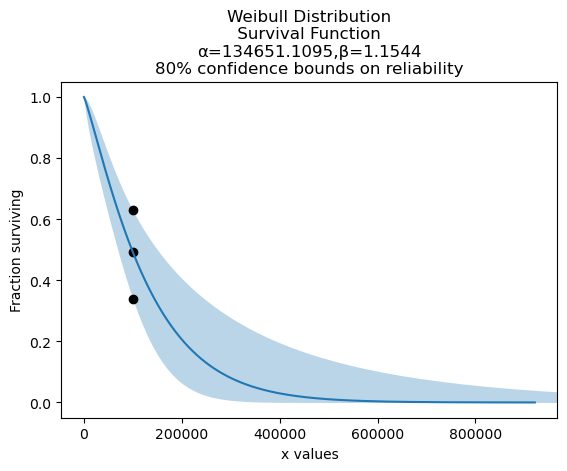

In [13]:
lower, point, upper = fit.distribution.SF(CI_x = 100000, CI_type = 'reliability', CI = 0.8)
plt.scatter([100000,100000,100000],[lower,point,upper],color='black')

In [15]:
print('Failures:',automotive().failures)
print('Right censored:',automotive().right_censored)
print('')
print("The 80% reliability estimates at 100000 miles are:")
print("lower bound: "+"{:.2%}".format(lower))
print("point estimate: "+"{:.2%}".format(point))
print("upper bound: "+"{:.2%}".format(upper))
plt.show()

Failures: [5248, 7454, 16890, 17200, 38700, 45000, 49390, 69040, 72280, 131900]
Right censored: [3961, 4007, 4734, 6054, 7298, 10190, 23060, 27160, 28690, 37100, 40060, 45670, 53000, 67000, 69630, 77350, 78470, 91680, 105700, 106300, 150400]

The 80% reliability estimates at 100000 miles are:
lower bound: 33.83%
point estimate: 49.20%
upper bound: 62.87%
